In [1]:
# general dependencies
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords
import wordcloud

# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords')


from tqdm import tqdm

tqdm.pandas()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/infres/bouharra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

filter_ = lambda word_list : ' '.join([word for word in word_list.split() if word not in stopwords.words('english')])

In [3]:
filter_('the sky is blue')

'sky blue'

In [7]:
df = pd.read_pickle('stemmed.pkl')

In [10]:
df['text_word_count'] = df.wordCount

In [9]:
df['clean'] = df.stemsText.apply(lambda x: ' '.join(x))

In [18]:
df.trendingTimes

0         8.0
1        11.0
2         6.0
3         8.0
4         0.0
         ... 
11547     0.0
11548     0.0
11549     0.0
11550     0.0
11551     0.0
Name: trendingTimes, Length: 11552, dtype: float64

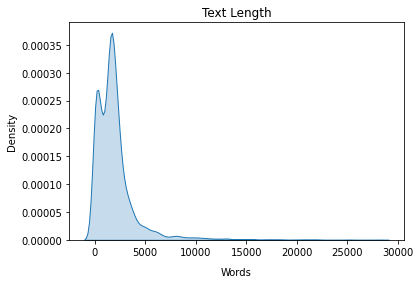

In [11]:
sns.kdeplot(data=df, x="text_word_count", palette = 'viridis', shade = True)
plt.title('Text Length', size=12)
plt.xlabel('Words', size=10, labelpad=10)
plt.show()

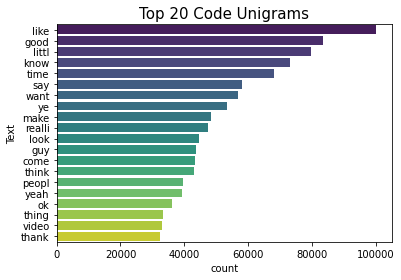

In [12]:
codes_unigrams = get_top_n_words(df.clean,20)

df1 = pd.DataFrame(codes_unigrams, columns = ['Text' , 'count'])
df1 = df1.groupby('Text').sum()['count'].sort_values(ascending=False)
df1 = pd.DataFrame(df1).reset_index()
sns.barplot(y = 'Text', x = 'count', data = df1, palette = 'viridis')
plt.title('Top 20 Code Unigrams', size=15)
plt.show()

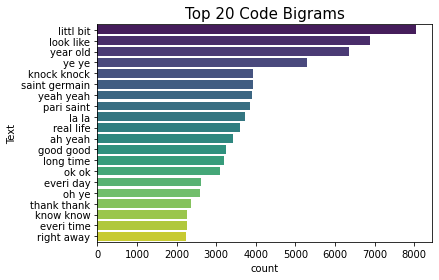

In [13]:
codes_bigrams = get_top_n_gram(df.clean,(2,2),20)

#for word, freq in top_bigrams:
df1 = pd.DataFrame(codes_bigrams, columns = ['Text' , 'count'])
df1 = df1.groupby('Text').sum()['count'].sort_values(ascending=False)
df1 = pd.DataFrame(df1).reset_index()
sns.barplot(y = 'Text', x = 'count', data = df1, palette = 'viridis')
plt.title('Top 20 Code Bigrams', size=15)
plt.show()

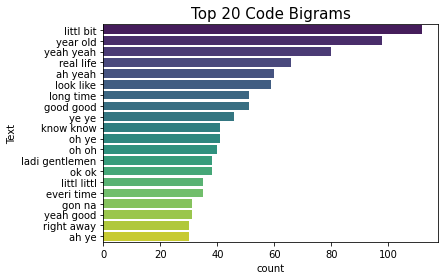

In [20]:
codes_bigrams = get_top_n_gram(df[df.trendingTimes>8].clean,(2,2),20)

#for word, freq in top_bigrams:
df1 = pd.DataFrame(codes_bigrams, columns = ['Text' , 'count'])
df1 = df1.groupby('Text').sum()['count'].sort_values(ascending=False)
df1 = pd.DataFrame(df1).reset_index()
sns.barplot(y = 'Text', x = 'count', data = df1, palette = 'viridis')
plt.title('Top 20 Code Bigrams', size=15)
plt.show()

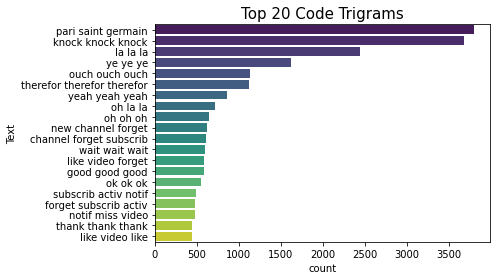

In [14]:
codes_bigrams = get_top_n_gram(df.clean,(3,3),20)

#for word, freq in top_bigrams:
df1 = pd.DataFrame(codes_bigrams, columns = ['Text' , 'count'])
df1 = df1.groupby('Text').sum()['count'].sort_values(ascending=False)
df1 = pd.DataFrame(df1).reset_index()
sns.barplot(y = 'Text', x = 'count', data = df1, palette = 'viridis')
plt.title('Top 20 Code Trigrams', size=15)
plt.show()

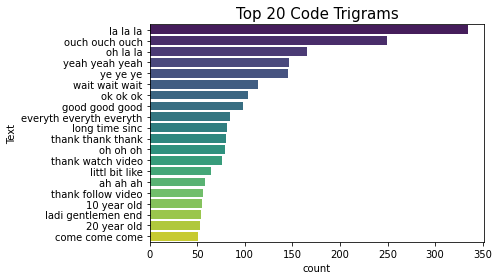

In [19]:
codes_bigrams = get_top_n_gram(df[df.trendingTimes>3].clean,(3,3),20)

#for word, freq in top_bigrams:
df1 = pd.DataFrame(codes_bigrams, columns = ['Text' , 'count'])
df1 = df1.groupby('Text').sum()['count'].sort_values(ascending=False)
df1 = pd.DataFrame(df1).reset_index()
sns.barplot(y = 'Text', x = 'count', data = df1, palette = 'viridis')
plt.title('Top 20 Code Trigrams', size=15)
plt.show()

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=2000000,
        max_font_size=40, 
        scale=2,
        random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

Word Cloud


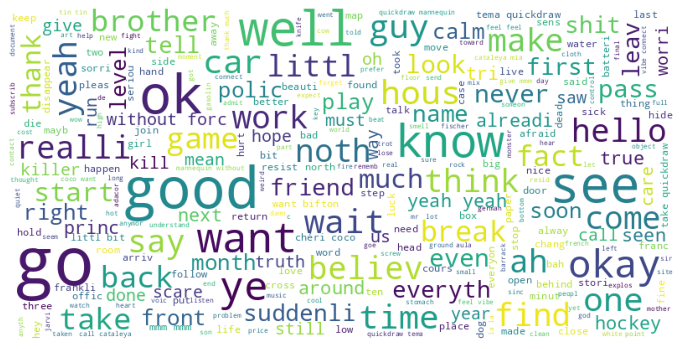

In [22]:
print("Word Cloud")
show_wordcloud(df.clean.values)

Word Cloud


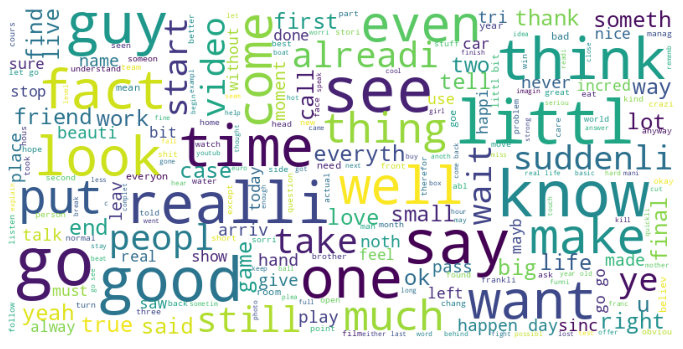

In [23]:
print("Word Cloud")
show_wordcloud(df[df.trendingTimes>5].clean.values)